In [2]:
import pandas as pd

df = pd.read_csv('Data/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [3]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  unfeigned alilum ciall ambiien aagrra xaanax c...    1

In [4]:
df.drop_duplicates(inplace=True)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

Chia tập dữ liệu 80/20

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Sử dụng thuật toán Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

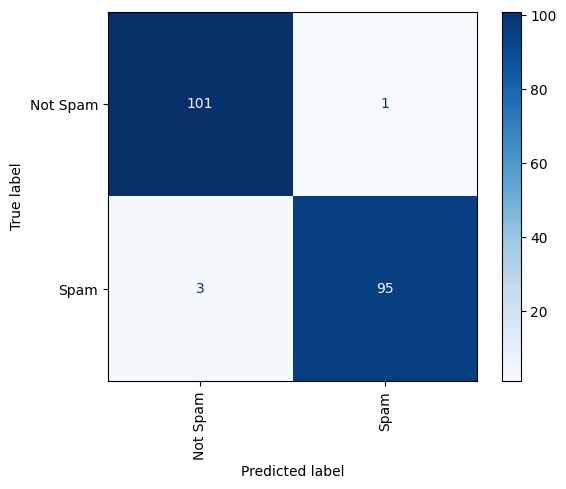

In [9]:
%matplotlib inline

from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Not Spam', 'Spam'],
                   cmap='Blues', xticks_rotation='vertical')

Mô hình đã xác định đúng 101 trong số 102 email hợp lệ không phải là thư rác và 95 trong số 98 email rác là thư rác

In [10]:
model.score(x_test, y_test)

0.98

Tiến hành vẽ đường cong ROC để kiểm nghiệm độ chính xác của mô hình

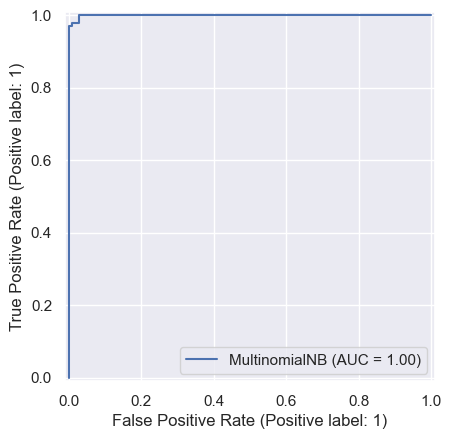

In [11]:
from sklearn.metrics import RocCurveDisplay as rcd

import seaborn as sns

sns.set()

rcd.from_estimator(model, x_test, y_test)


1. **Đường cong ROC (Receiver Operating Characteristic):**  
   - Đây là đồ thị biểu diễn mối quan hệ giữa:
     - **True Positive Rate (TPR)**: Tỷ lệ dự đoán dương tính chính xác (trục y).  
     - **False Positive Rate (FPR)**: Tỷ lệ dương tính sai (trục x).  
   - Đồ thị được sử dụng để đánh giá **hiệu suất** của mô hình phân loại.

2. **Đặc điểm của đường cong**:  
   - Đường cong gần như áp sát trục **y = 1**, cho thấy:
     - **True Positive Rate (TPR)** rất cao.  
     - **False Positive Rate (FPR)** gần bằng 0.  
   - Điều này thể hiện mô hình **phân loại chính xác gần như hoàn hảo**, không mắc nhiều lỗi dự đoán dương tính sai.

3. **AUC = 1.00** (Area Under Curve):  
   - Giá trị AUC bằng **1.00** cho thấy mô hình có **độ phân biệt hoàn hảo** giữa hai lớp (positive và negative).  
   - Trong thực tế, AUC = 1 thường xuất hiện khi:
     - Mô hình huấn luyện trên dữ liệu quá dễ.  
     - Dữ liệu huấn luyện và kiểm tra trùng lặp hoặc không cân bằng.  
     - Mô hình bị **quá khớp (overfitting)** trên dữ liệu huấn luyện.  

4. **Kết luận:**  
   - Đường cong ROC và AUC = 1.00 cho thấy mô hình **MultinomialNB** hoạt động rất tốt trên tập dữ liệu này.  
   - Tuy nhiên, bạn cần kiểm tra kỹ hơn để đảm bảo mô hình không bị **overfitting** hoặc kết quả không bị ảnh hưởng bởi dữ liệu kiểm tra trùng lặp.

Thử với một tin nhắn xem mô hình phân loại như nào

In [13]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]

np.int64(0)

In [14]:
model.predict_proba(input)[0][0]

np.float64(0.9999497111473539)

Mô hình dự đoán email trên không phải là thư rác.
Xác suất là 0.9999

In [15]:
msg = 'Why pay more for expensive meds when you can order them online '\
      'and save $$$?'

input = vectorizer.transform([msg])
model.predict(input)[0]

np.int64(1)